In [1]:
import pandas as pd
df_collab = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42.csv', index_col = 'name', encoding = "UTF-8")
df_collab_new = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42_v2.csv', index_col = 'name', encoding = "UTF-8")
df_disrupt = pd.read_csv('C:\\Users\\Brend\\Downloads\\disrupt_profs_top42.csv', index_col = 'name', encoding = "UTF-8")
df_impact = pd.read_csv('C:\\Users\\Brend\\Downloads\\impact_top42.csv', index_col = 'name', encoding = "UTF-8")
df_clusters = pd.read_csv('C:\\Users\\Brend\\Downloads\\clusters_top42.csv', index_col = 'name', encoding = "UTF-8")
df_unique_profs = pd.read_csv('C:\\Users\\Brend\\Downloads\\unique_profs_top42.csv', index_col = 'name', encoding = "UTF-8")

In [2]:
all_dfs = [df_collab_new, df_disrupt, df_impact, df_clusters, df_unique_profs]
df = all_dfs[0]
for i in range(1, len(all_dfs)):
    df = df.join(all_dfs[i], how = 'outer')

In [3]:
print("Total: %d authors" % df.shape[0])
df_collab_trim = df[df['num_pubs'] >= 50]
df_collab_trim = df_collab_trim[df_collab_trim['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_collab_trim.shape[0])

Total: 1965872 authors
Remaining after trimming: 368618 authors


In [4]:
df_impact_trim = df_collab_trim

In [5]:
df_disrupt_trim = df[df['num_disrupt'] >= 10]
print("Remaining after trimming: %d authors" % df_disrupt_trim.shape[0])

Remaining after trimming: 57857 authors


In [7]:
df_disrupt_profs_only_trim = df[df['num_disrupt'] >= 10]
print("Remaining after trimming: %d authors" % df_disrupt_profs_only_trim.shape[0])

Remaining after trimming: 57857 authors


In [8]:
df_unique_profs_trim = df_collab_trim

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [11]:
def log(df):
    for col in df.columns:
        log_col = df[[col]]
        df[col + '_log'] = log_col.apply(np.log, axis=0)
    return df[[col for col in df.columns if 'log' in col]]

In [18]:
def joint_plot(X, x_cols, Y, y_cols, log_scale_x = False, log_scale_y = False):
    if log_scale_x: 
        X = log(X)
        x_cols = [col+'_log' for col in x_cols]
    if log_scale_y:
        Y = log(Y)
        y_cols = [col+'_log' for col in y_cols]
    for x_col in x_cols:
        for y_col in y_cols:
            data = pd.concat([X[[x_col]], Y[[y_col]]], axis = 1)
            f, ax = plt.subplots(figsize=(8,8))
            g = sns.regplot(x_col, y_col, data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
            plt.show()

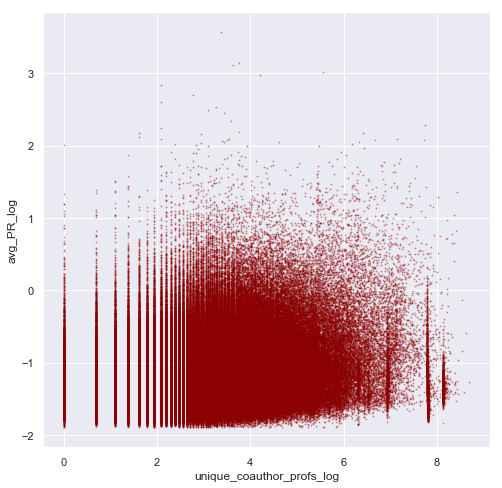

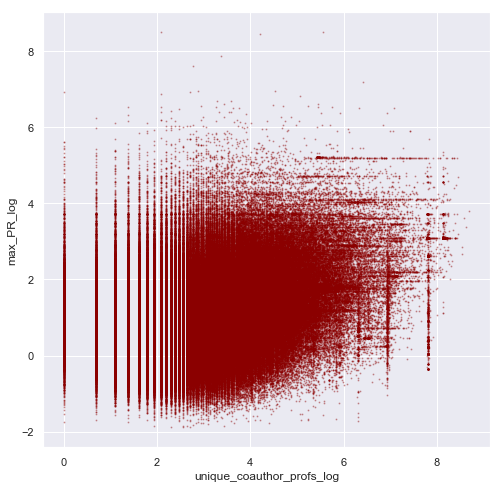

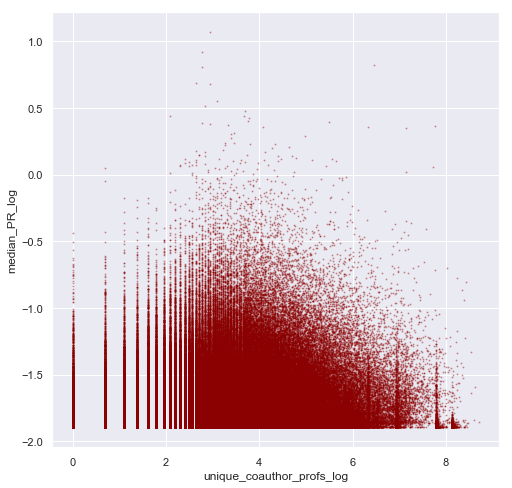

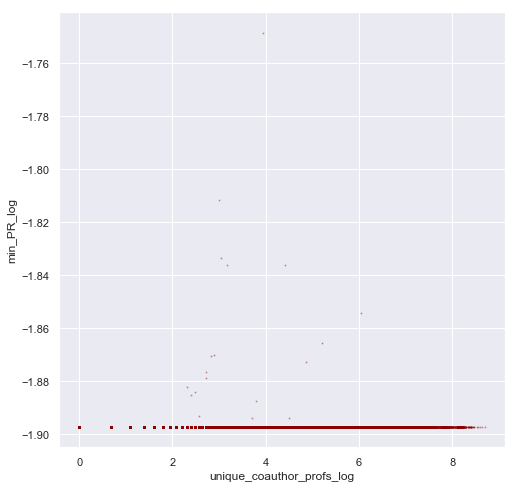

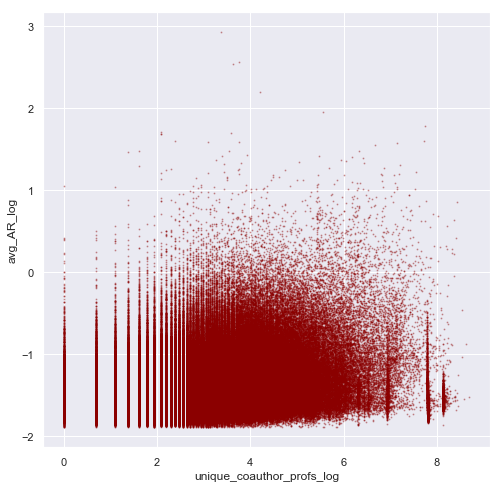

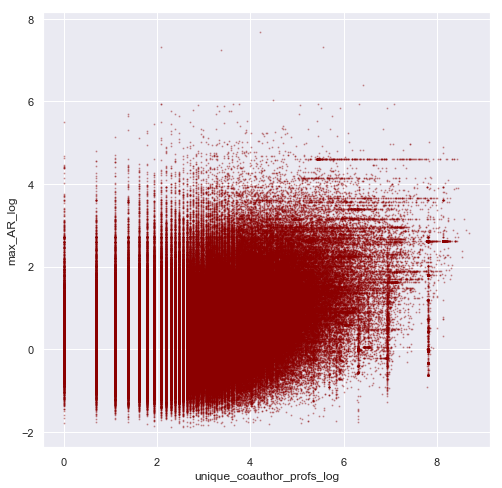

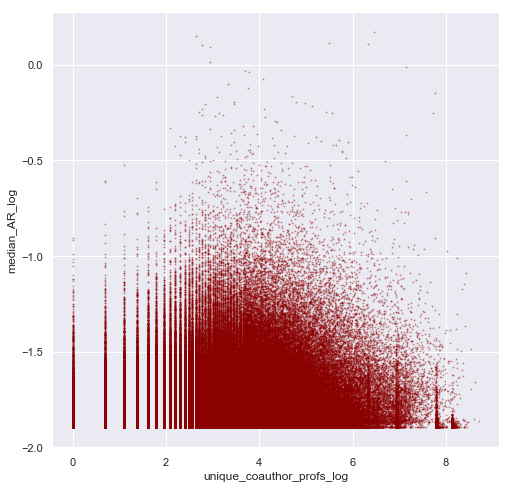

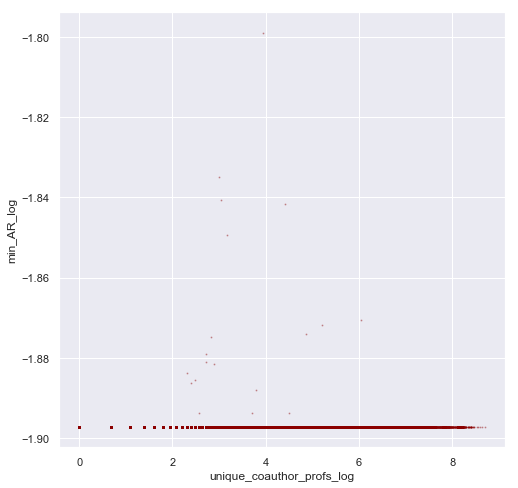

In [23]:
joint_plot(df_unique_profs_trim, df_unique_profs.columns, df_impact_trim, df_impact.columns, log_scale_x = True, log_scale_y = True )

c:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


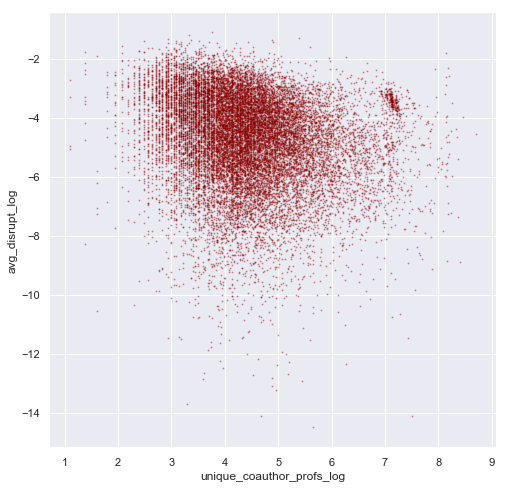

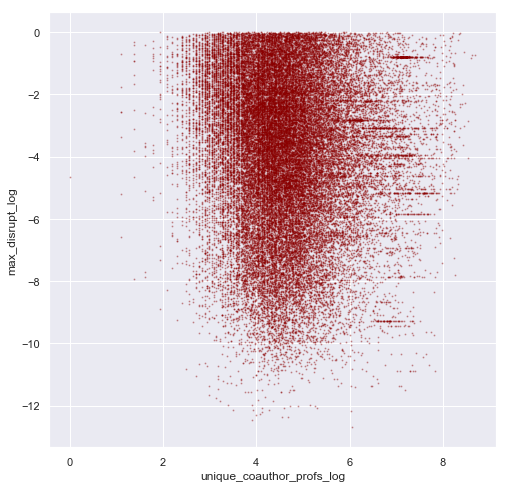

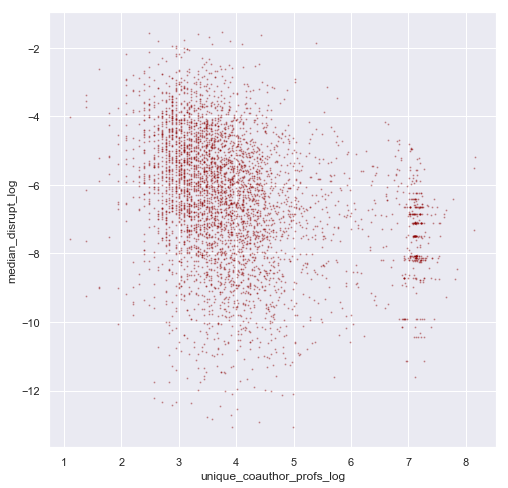

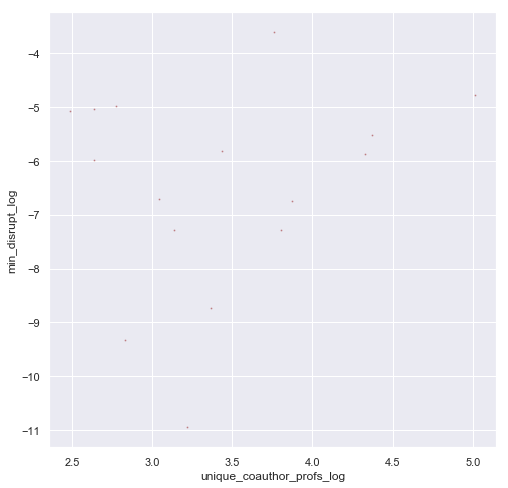

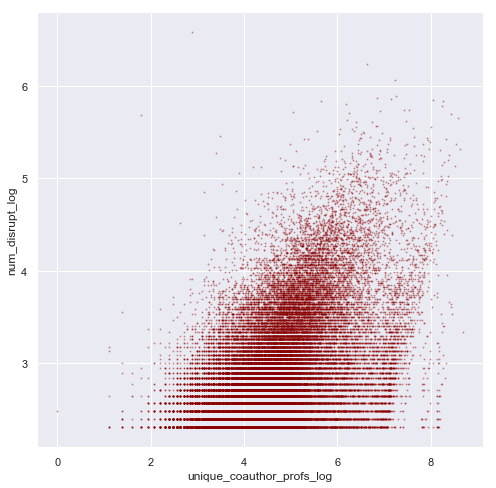

In [24]:
joint_plot(df_unique_profs_trim, df_unique_profs.columns, df_disrupt_trim, df_disrupt.columns, log_scale_x = True, log_scale_y = True )

c:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


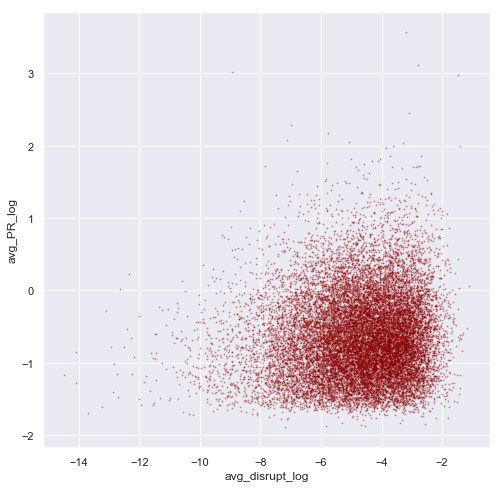

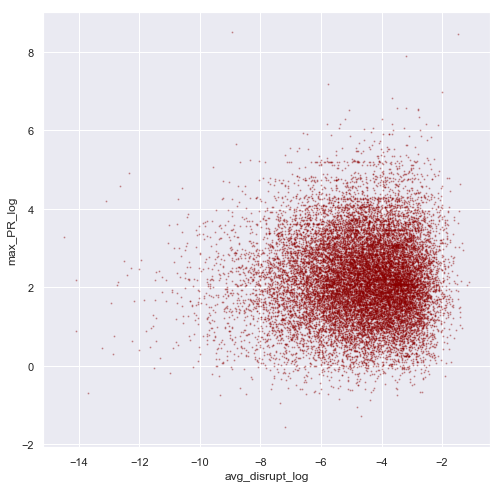

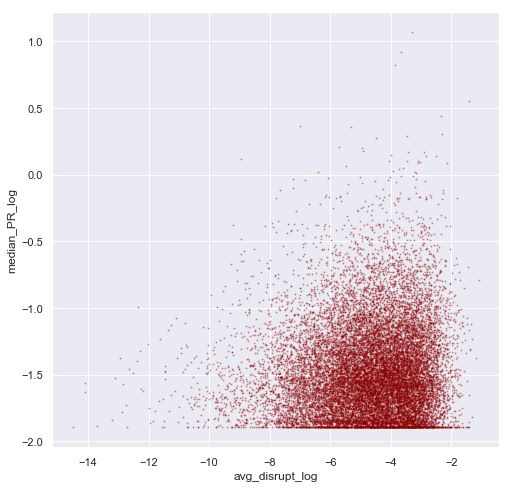

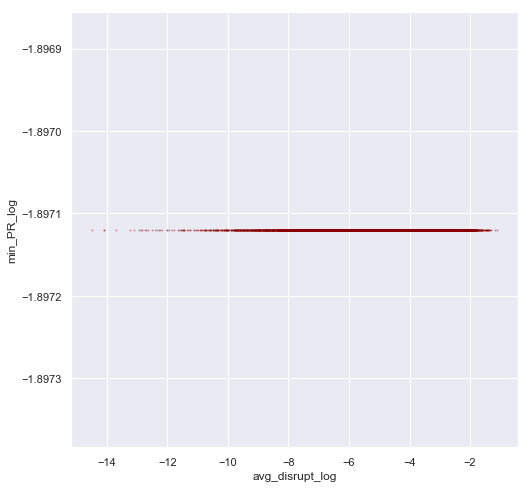

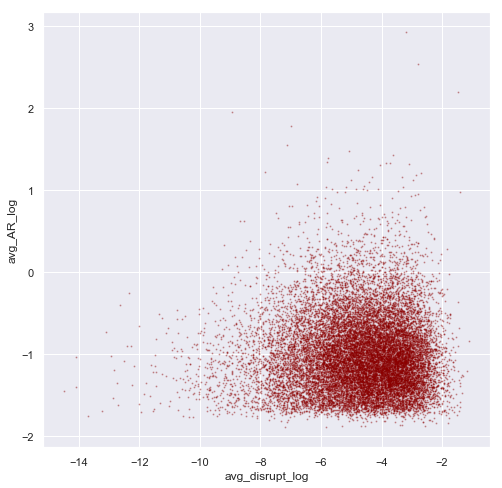

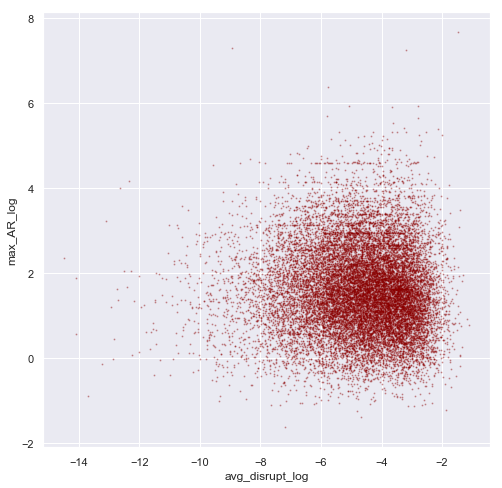

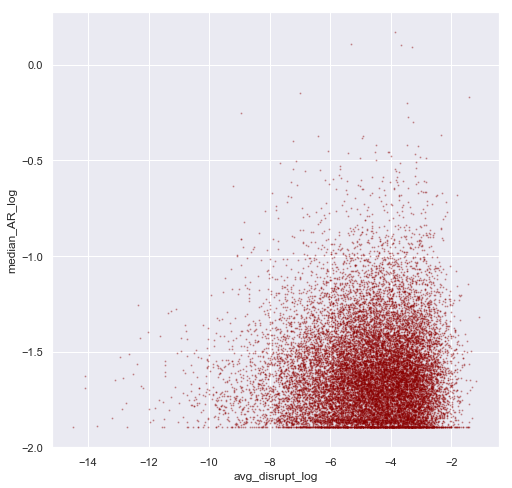

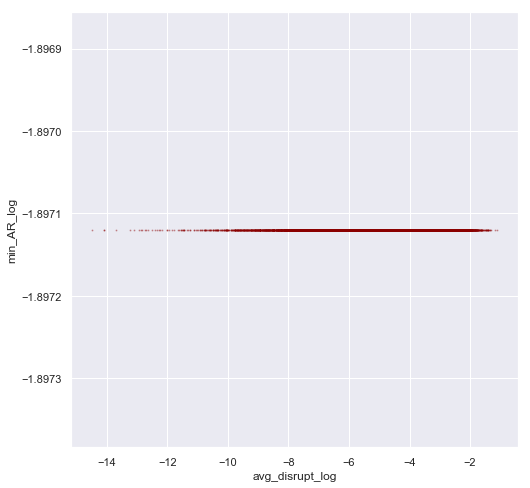

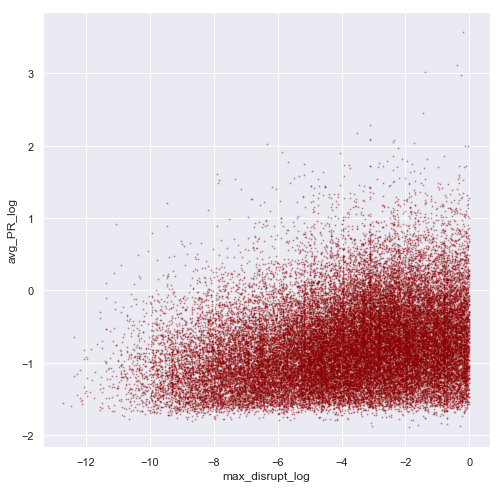

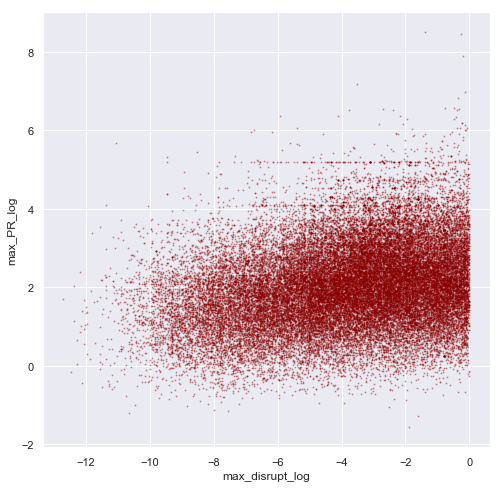

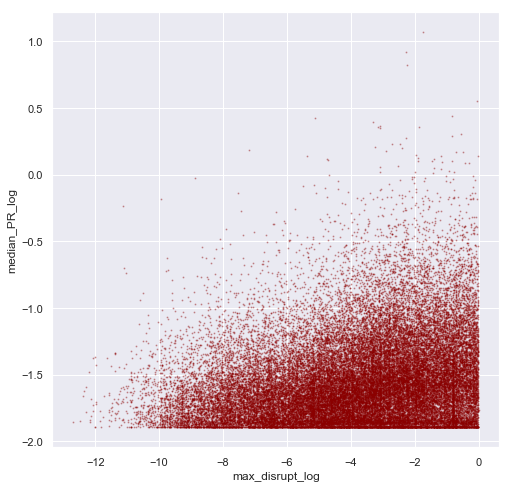

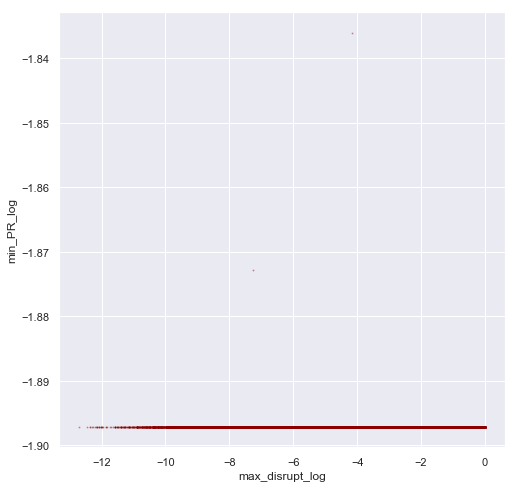

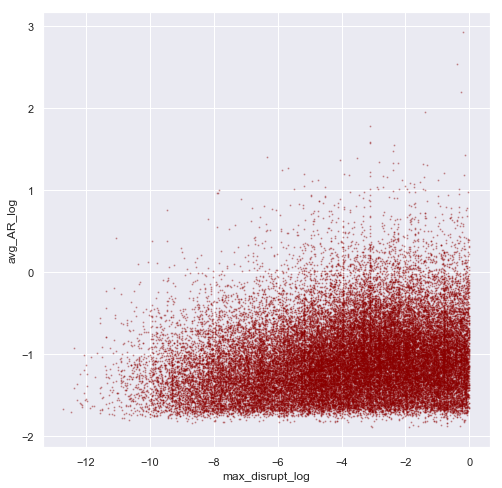

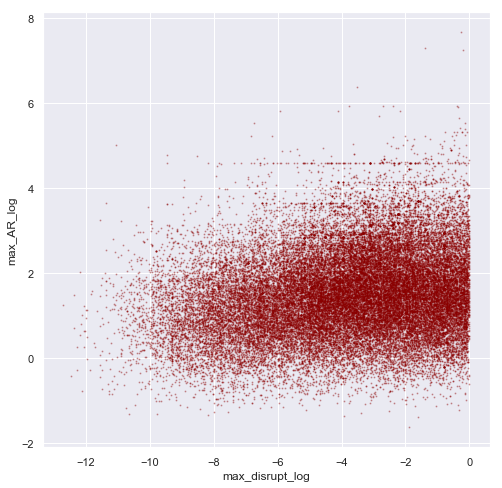

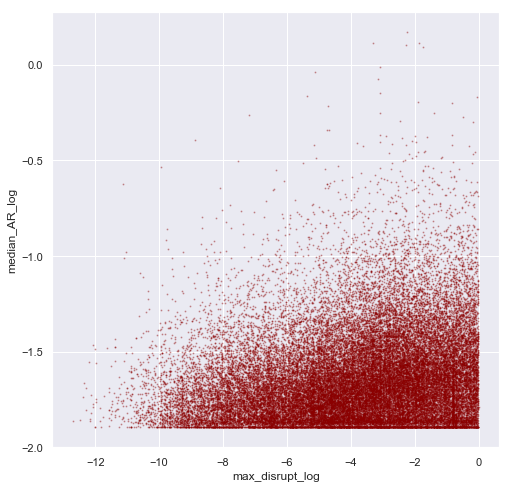

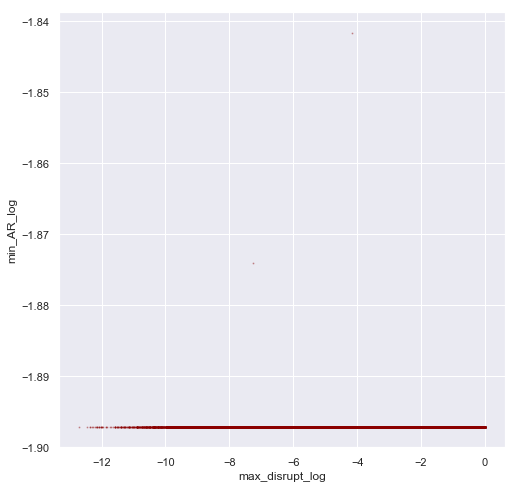

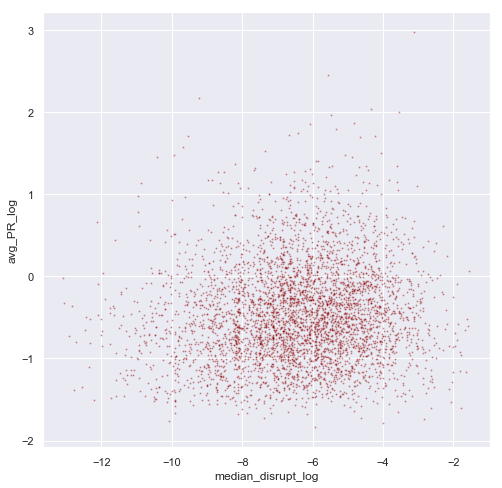

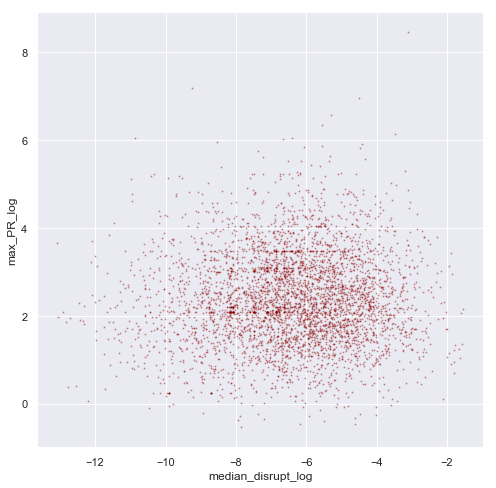

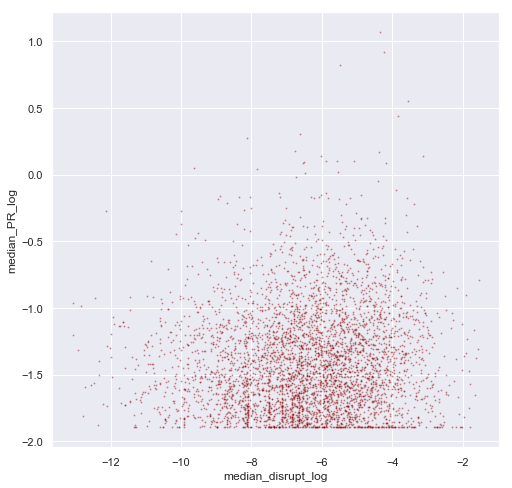

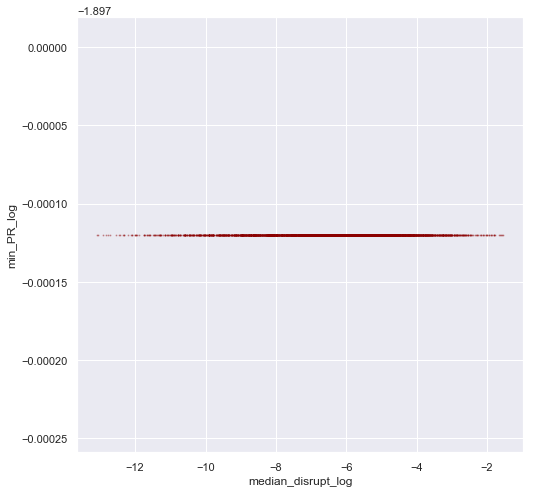

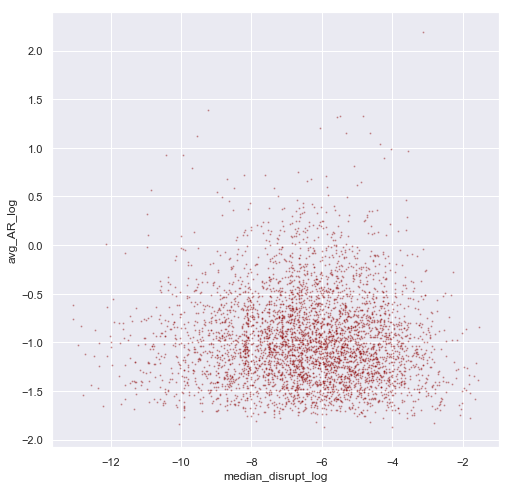

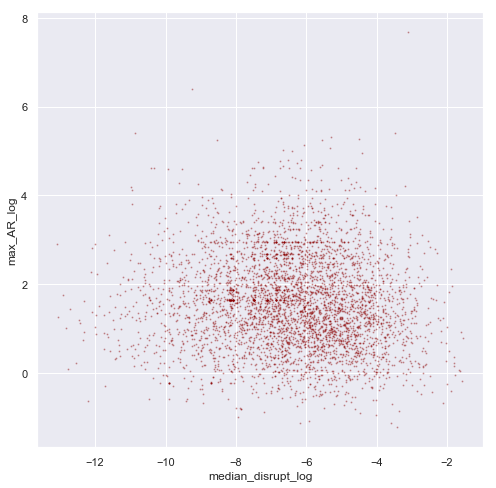

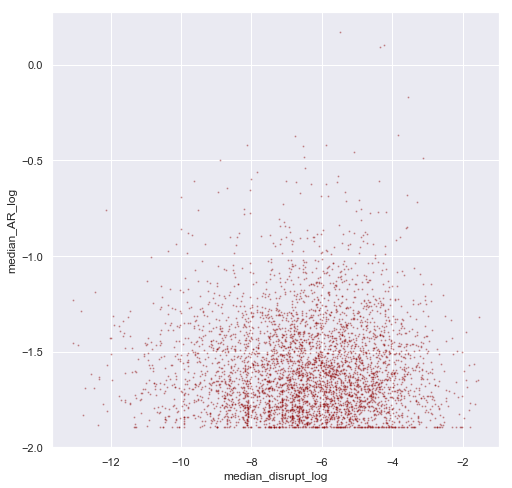

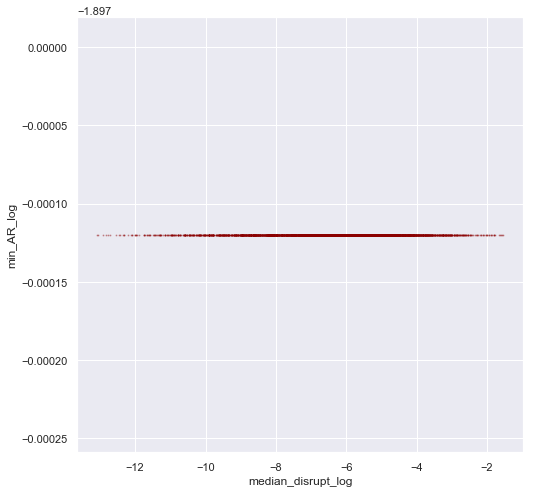

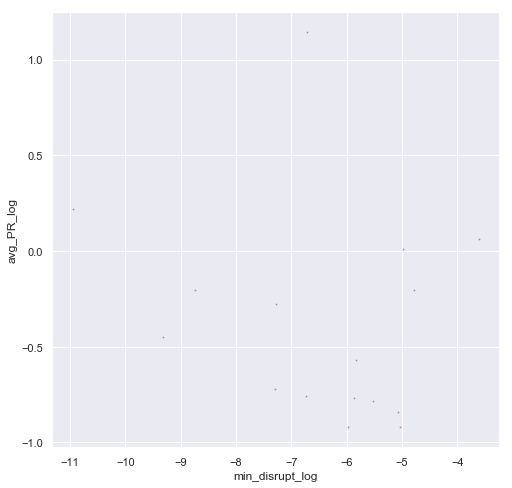

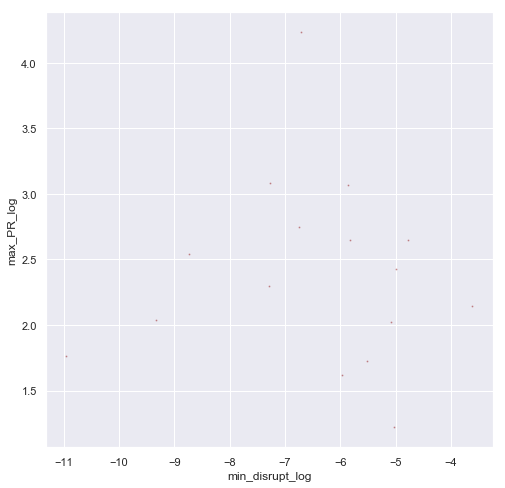

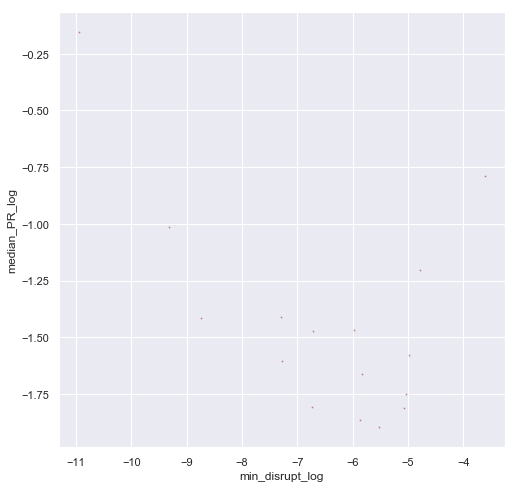

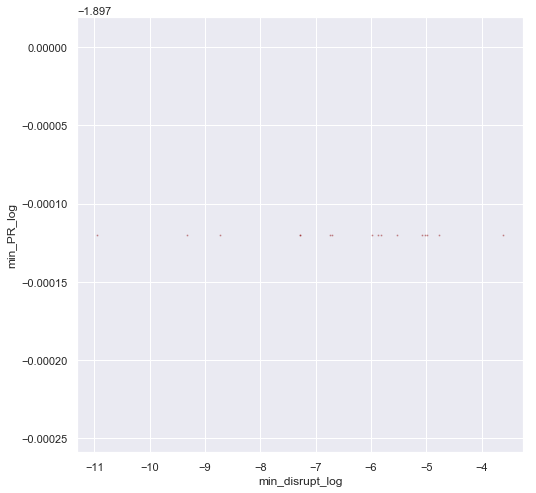

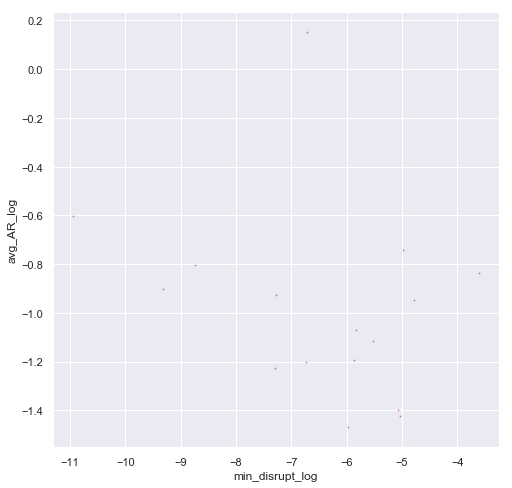

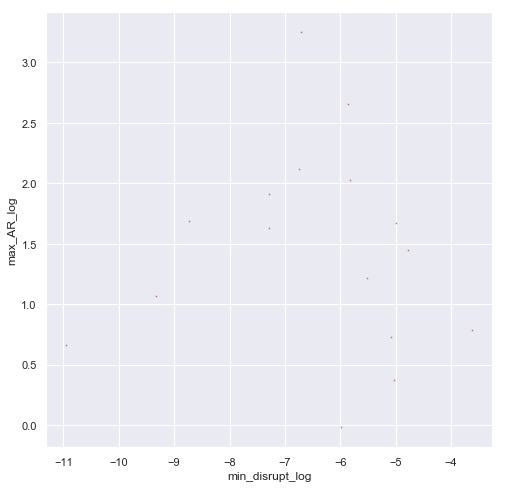

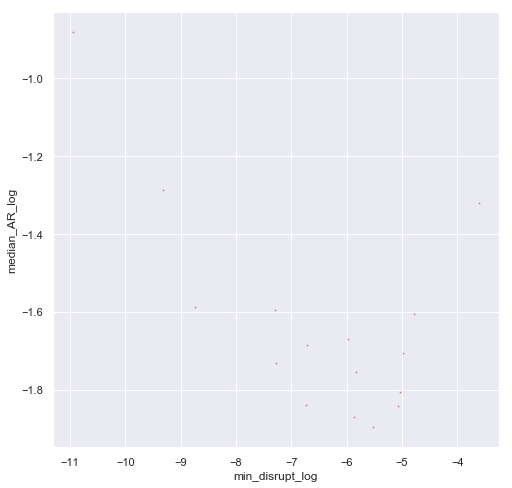

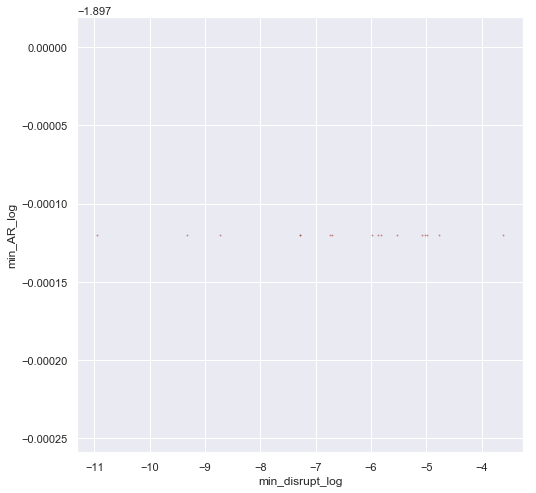

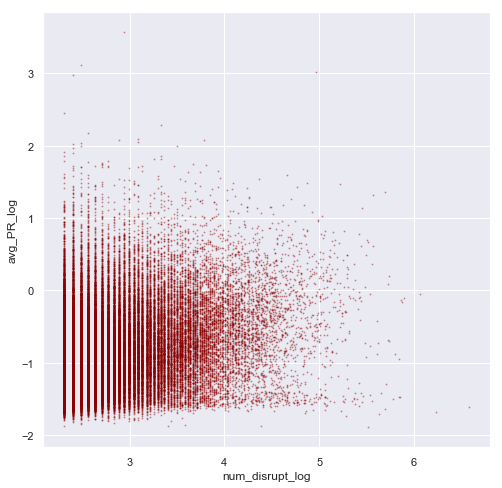

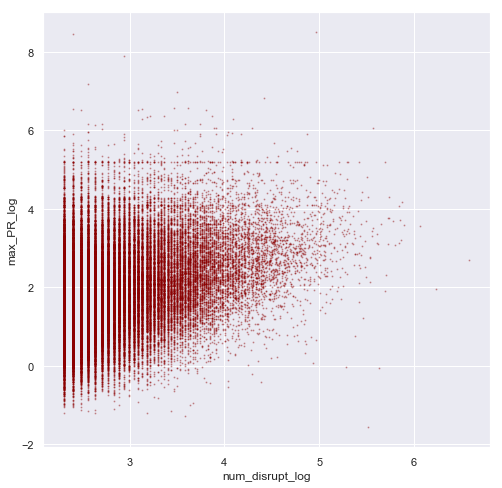

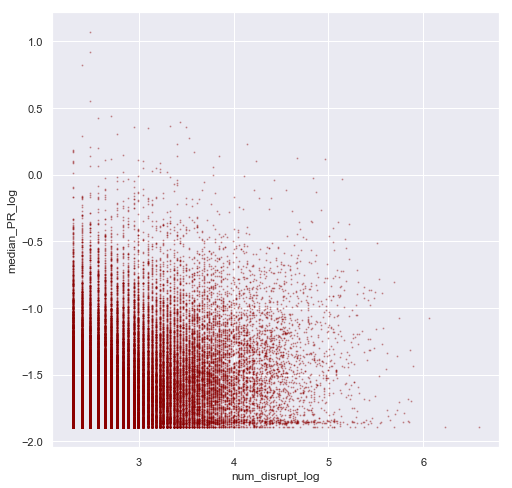

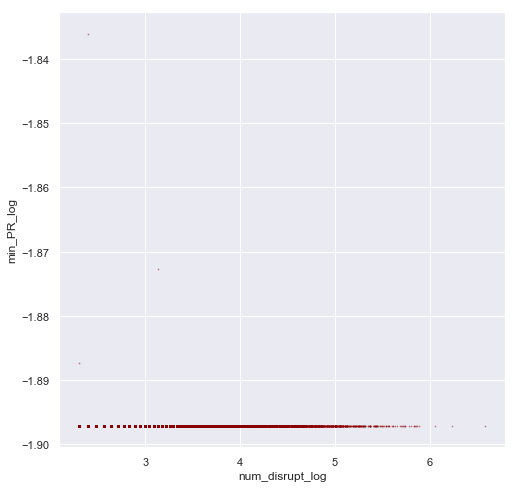

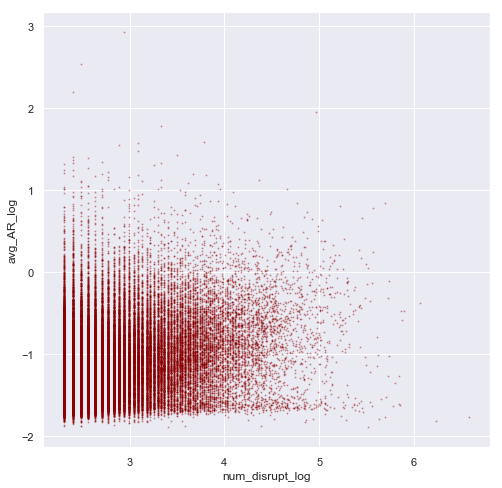

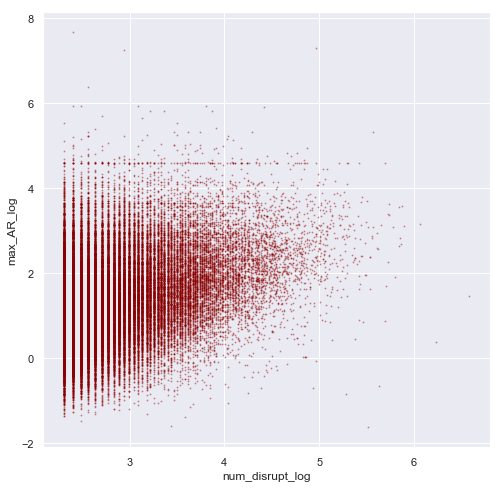

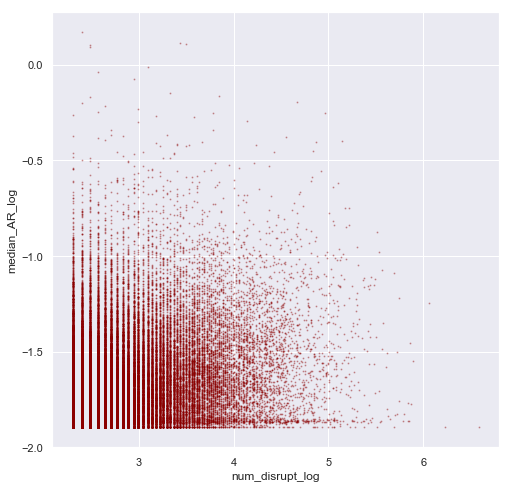

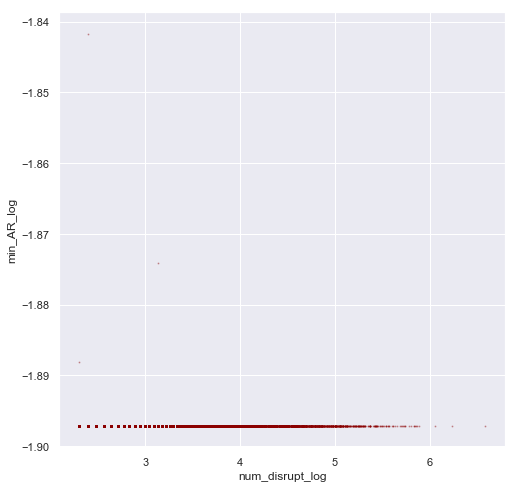

In [25]:
joint_plot(df_disrupt_trim, df_disrupt.columns, df_impact_trim, df_impact.columns, log_scale_x = True, log_scale_y = True )

In [ ]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']
disrupt = ['avg_disrupt', 'max_disrupt', 'median_disrupt', 'min_disrupt']

In [ ]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [ ]:
for x_col in linear_metrics:
    for y_col in impact:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in log_metrics:
    for y_col in impact:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in disrupt:
    for y_col in impact:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()

In [ ]:
for x_col in disrupt:
    for y_col in log_metrics:
        data = pd.concat([df_log[[x_col+'_log']], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col+'_log', y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


In [ ]:
for x_col in linear_metrics:
    for y_col in disrupt:
        data = pd.concat([df_trimmed[[x_col]], df_log[[y_col+'_log']]], axis = 1)
        f, ax = plt.subplots(figsize=(8, 8))        
        g = sns.regplot(x_col, y_col+'_log', data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()